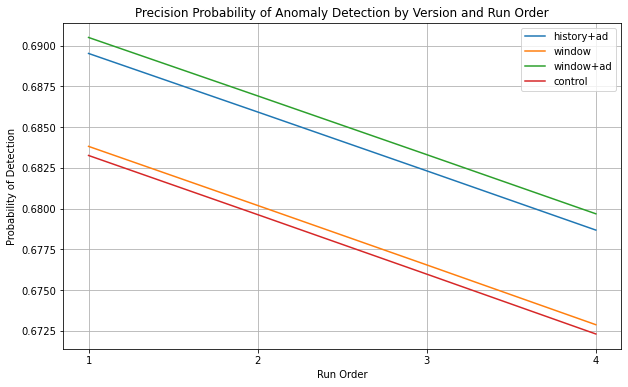

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with the predictors
run_order = np.linspace(-1.5, 1.5, 4)  # Adjust run_order to range from -1.5 to 1.5
categories = ['history+ad', 'window', 'window+ad', 'control']
data = pd.DataFrame({
    'run_order': np.tile(run_order, 4),
    'version_num': np.repeat(categories, 4),
})

# Create dummy variables for each category
data['history_ad'] = (data['version_num'] == 'history+ad').astype(int)
data['window'] = (data['version_num'] == 'window').astype(int)
data['window_ad'] = (data['version_num'] == 'window+ad').astype(int)
data['control'] = (data['version_num'] == 'control').astype(int)

# Define the coefficients based on the provided model output
coefs = {
    'intercept': 0.7437186,
    'run_order': -0.0167289,
    'history_ad': 0.0291,
    'window': 0.0025825,
    'window_ad': 0.0336904
}

# Calculate predicted probabilities
def predict_probability(row):
    intercept = coefs['intercept']
    run_order = row['run_order']
    log_odds = intercept + coefs['run_order'] * run_order

    if row['version_num'] == 'history+ad':
        log_odds += coefs['history_ad']
    elif row['version_num'] == 'window':
        log_odds += coefs['window']
    elif row['version_num'] == 'window+ad':
        log_odds += coefs['window_ad']

    probability = 1 / (1 + np.exp(-log_odds))
    return probability

data['probability_of_detection'] = data.apply(predict_probability, axis=1)

# Separate data by version_num for plotting
data_history_ad = data[data['version_num'] == 'history+ad']
data_window = data[data['version_num'] == 'window']
data_window_ad = data[data['version_num'] == 'window+ad']
data_control = data[data['version_num'] == 'control']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data_history_ad['run_order'], data_history_ad['probability_of_detection'], label='history+ad')
plt.plot(data_window['run_order'], data_window['probability_of_detection'], label='window')
plt.plot(data_window_ad['run_order'], data_window_ad['probability_of_detection'], label='window+ad')
plt.plot(data_control['run_order'], data_control['probability_of_detection'], label='control')

plt.xlabel('Run Order')
plt.ylabel('Probability of Detection')
plt.title('Precision Probability of Anomaly Detection by Version and Run Order')
plt.legend()
plt.grid(True)

# Set custom x-axis labels
custom_labels = { -1.5: 1, -0.5: 2, 0.5: 3, 1.5: 4 }
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()))  # Set the x-axis ticks and labels

plt.show()


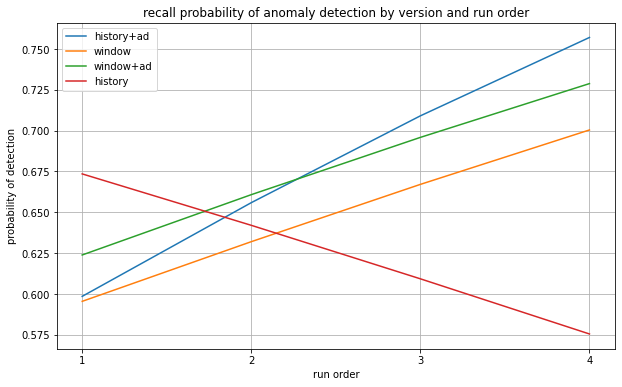

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with the predictors
run_order = np.linspace(-1.5, 1.5, 4)
categories = ['history+ad', 'window', 'window+ad', 'control']
data = pd.DataFrame({
    'run_order': np.tile(run_order, 4),
    'version_num': np.repeat(categories, 4),
})

# Create dummy variables for each category
data['history_ad'] = (data['version_num'] == 'history+ad').astype(int)
data['window'] = (data['version_num'] == 'window').astype(int)
data['window_ad'] = (data['version_num'] == 'window+ad').astype(int)
data['history'] = (data['version_num'] == 'control').astype(int)

# Define the coefficients based on the new model output
coefs = {
    'intercept': 0.5142658,
    'run_order': -0.1399133,
    'history_ad': 0.2537111,
    'window': 0.1037363,
    'window_ad': 0.233052,
    'history_ad_run_order': 0.3856278,
    'window_run_order': 0.2941078,
    'window_ad_run_order': 0.3007457
}

# Calculate predicted values (log-odds)
def predict_log_odds(row):
    intercept = coefs['intercept']
    run_order = row['run_order']
    log_odds = intercept + coefs['run_order'] * run_order

    if row['version_num'] == 'history+ad':
        log_odds += coefs['history_ad'] + coefs['history_ad_run_order'] * run_order
    elif row['version_num'] == 'window':
        log_odds += coefs['window'] + coefs['window_run_order'] * run_order
    elif row['version_num'] == 'window+ad':
        log_odds += coefs['window_ad'] + coefs['window_ad_run_order'] * run_order

    return log_odds

# Convert log-odds to probability
def log_odds_to_probability(log_odds):
    return 1 / (1 + np.exp(-log_odds))

data['log_odds'] = data.apply(predict_log_odds, axis=1)
data['probability'] = log_odds_to_probability(data['log_odds'])

# Separate data by version_num for plotting
data_history_ad = data[data['version_num'] == 'history+ad']
data_window = data[data['version_num'] == 'window']
data_window_ad = data[data['version_num'] == 'window+ad']
data_control = data[data['version_num'] == 'control']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data_history_ad['run_order'], data_history_ad['probability'], label='history+ad')
plt.plot(data_window['run_order'], data_window['probability'], label='window')
plt.plot(data_window_ad['run_order'], data_window_ad['probability'], label='window+ad')
plt.plot(data_control['run_order'], data_control['probability'], label='history')

plt.xlabel('run order')
plt.ylabel('probability of detection')
plt.title('recall probability of anomaly detection by version and run order')
plt.legend()
plt.grid(True)
# Set custom x-axis labels
custom_labels = { -1.5: 1, -0.5: 2, 0.5: 3, 1.5: 4 }
plt.xticks(ticks=list(custom_labels.keys()), labels=list(custom_labels.values()))  # Set the x-axis ticks and labels
plt.show()


C:\Users\s152296\AppData\Local\Temp\ipykernel_56860\3597638120.py:61: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black', lw=2))


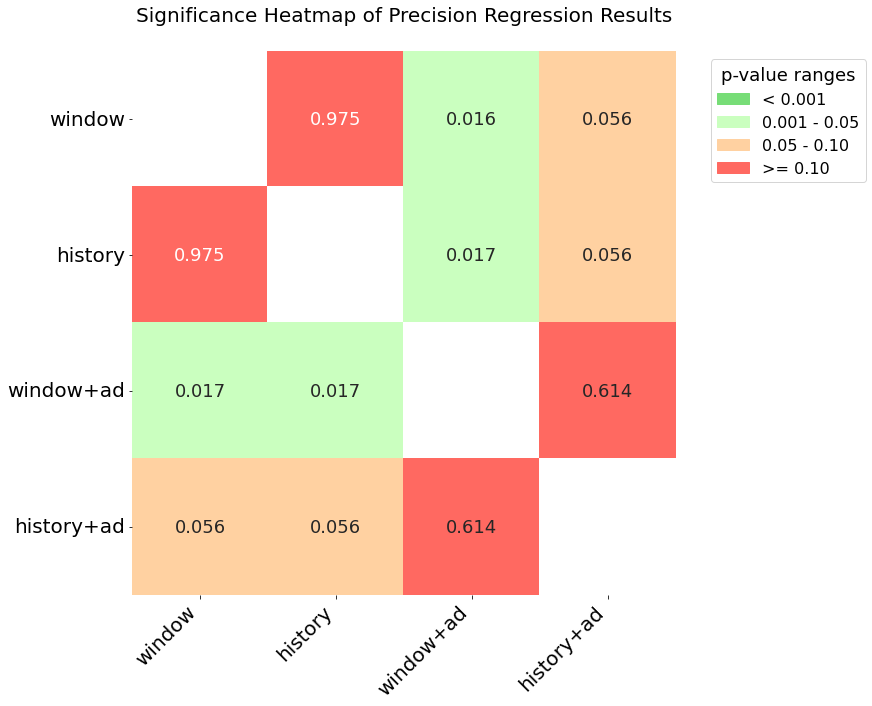

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the heatmap
data = {
    'history': {'history+ad': 0.056, 'window': 0.975, 'window+ad': 0.017},
    'history+ad': {'history': 0.056, 'window': 0.056, 'window+ad': 0.614},
    'window': {'history': 0.975, 'history+ad': 0.056, 'window+ad': 0.016},
    'window+ad': {'history': 0.017, 'history+ad': 0.614, 'window': 0.016}
}

# # Data for the heatmap
# data = {
#     'history': {'history+ad': 0.044, 'window': 0.858, 'window+ad': 0.020},
#     'history+ad': {'history': 0.044, 'window': 0.064, 'window+ad': 0.749},
#     'window': {'history': 0.858, 'history+ad': 0.064, 'window+ad': 0.030},
#     'window+ad': {'history': 0.020, 'history+ad': 0.749, 'window': 0.030}
# }

# Convert to DataFrame
df = pd.DataFrame(data)

# Reorder rows and columns
order = ['window', 'history', 'window+ad', 'history+ad']
df = df.reindex(order)
df = df[order]

# Create a pastel colormap
from matplotlib.colors import ListedColormap

pastel_colors = ['#77dd77', '#caffbf', '#ffd1a1', '#ff6961']
cmap = ListedColormap(pastel_colors)

# Function to map p-values to colors
def color_map(val):
    if pd.isna(val):
        return '#ffffff'  # white for NaNs
    elif val < 0.001:
        return '#77dd77'  # pastel green
    elif 0.001 <= val < 0.05:
        return '#caffbf'  # pastel light green
    elif 0.05 <= val < 0.10:
        return '#ffd1a1'  # pastel orange
    else:
        return '#ff6961'  # pastel red

# Apply color map function to each cell
colored_cells = df.applymap(color_map)

# Plot the heatmap with the correct colors
plt.figure(figsize=(12, 10))
sns.heatmap(df, annot=True, fmt='.3f', cmap=cmap, cbar=False, annot_kws={'size': 18},
            linewidths=.5, linecolor='black', square=True, mask=df.isna())

# Overlay the colored cells
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        color = colored_cells.iloc[i, j]
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black', lw=2))

# Customize category text size and rotation
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20, rotation=0)

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#77dd77', edgecolor='#77dd77', label='< 0.001'),
                   Patch(facecolor='#caffbf', edgecolor='#caffbf', label='0.001 - 0.05'),
                   Patch(facecolor='#ffd1a1', edgecolor='#ffd1a1', label='0.05 - 0.10'),
                   Patch(facecolor='#ff6961', edgecolor='#ff6961', label='>= 0.10')]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), title='p-value ranges', fontsize=16, title_fontsize=18)

# Add title with padding
plt.title('Significance Heatmap of Precision Regression Results', fontsize=20, pad=30)

plt.show()


C:\Users\s152296\AppData\Local\Temp\ipykernel_56860\186170664.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black', lw=2))


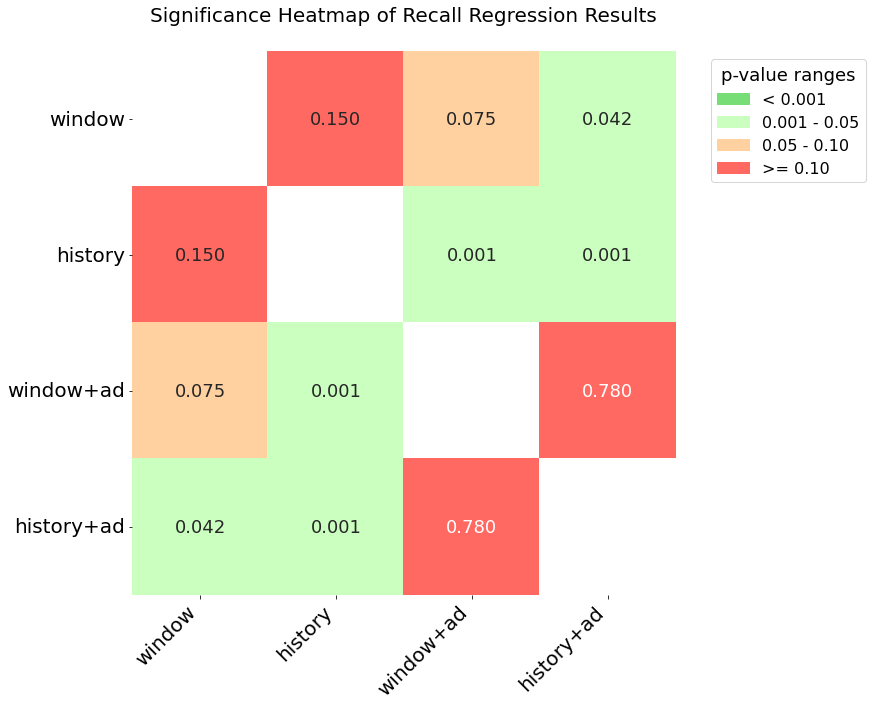

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the heatmap
data = {
    'history': {'history+ad': 0.001, 'window': 0.150, 'window+ad': 0.001},
    'history+ad': {'history': 0.001, 'window': 0.042, 'window+ad': 0.780},
    'window': {'history': 0.150, 'history+ad': 0.042, 'window+ad': 0.075},
    'window+ad': {'history': 0.001, 'history+ad': 0.780, 'window': 0.075}
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Reorder rows and columns
order = ['window', 'history', 'window+ad', 'history+ad']
df = df.reindex(order)
df = df[order]

# Create a pastel colormap
from matplotlib.colors import ListedColormap

pastel_colors = ['#77dd77', '#caffbf', '#ffd1a1', '#ff6961']
cmap = ListedColormap(pastel_colors)

# Function to map p-values to colors
def color_map(val):
    if pd.isna(val):
        return '#ffffff'  # white for NaNs
    elif val < 0.001:
        return '#77dd77'  # pastel green
    elif 0.001 <= val < 0.05:
        return '#caffbf'  # pastel light green
    elif 0.05 <= val < 0.10:
        return '#ffd1a1'  # pastel orange
    else:
        return '#ff6961'  # pastel red

# Apply color map function to each cell
colored_cells = df.applymap(color_map)

# Plot the heatmap with the correct colors
plt.figure(figsize=(12, 10))
sns.heatmap(df, annot=True, fmt='.3f', cmap=cmap, cbar=False, annot_kws={'size': 18},
            linewidths=.5, linecolor='black', square=True, mask=df.isna())

# Overlay the colored cells
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        color = colored_cells.iloc[i, j]
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black', lw=2))

# Customize category text size and rotation
plt.xticks(fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20, rotation=0)

# Add custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#77dd77', edgecolor='#77dd77', label='< 0.001'),
                   Patch(facecolor='#caffbf', edgecolor='#caffbf', label='0.001 - 0.05'),
                   Patch(facecolor='#ffd1a1', edgecolor='#ffd1a1', label='0.05 - 0.10'),
                   Patch(facecolor='#ff6961', edgecolor='#ff6961', label='>= 0.10')]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), title='p-value ranges', fontsize=16, title_fontsize=18)

# Add title with padding
plt.title('Significance Heatmap of Recall Regression Results', fontsize=20, pad=30)

plt.show()

In [78]:
(np.exp(-.2040492)-1)*100

-18.457774857441557